In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [75]:
import os
import zipfile

# Path to your zip file in Google Drive
zip_file_path = '/content/drive/MyDrive/ML/DressRec.zip'
extract_dir = '/content/DressRec/'

# Check if the directory exists, if not create it
if not os.path.exists(extract_dir):
    os.makedirs(extract_dir)

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print("Dataset extracted successfully.")


Dataset extracted successfully.


In [76]:
import glob

# List all images in the directory
image_paths = glob.glob(extract_dir + '**/*.*', recursive=True)

# Filter for specific image file types (jpg, png, jpeg, webp)
image_paths = [file for file in image_paths if file.lower().endswith(('.png', '.jpg', '.jpeg', '.webp'))]

print(f"Found {len(image_paths)} image files.")


Found 96 image files.


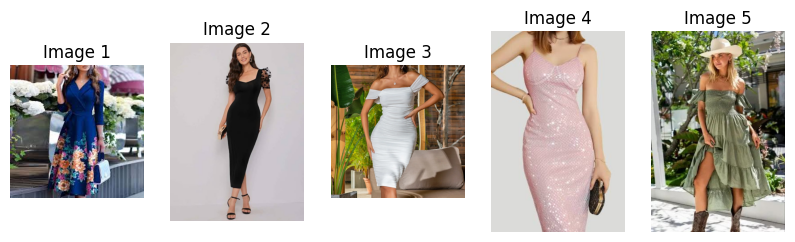

In [77]:
import matplotlib.pyplot as plt
import random
import cv2

# Function to display random images
def display_random_images(image_paths, num_images=5):
    plt.figure(figsize=(10, 10))
    for i in range(num_images):
        img_path = random.choice(image_paths)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display

        plt.subplot(1, num_images, i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Image {i+1}")
    plt.show()

# Visualize random 5 images
display_random_images(image_paths, num_images=5)


In [78]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

# Load the VGG16 model for feature extraction
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def extract_features(image_paths):
    all_features = []
    all_image_names = []
    for img_path in image_paths:
        img_array = preprocess_image(img_path)
        features = base_model.predict(img_array)
        features_flatten = features.flatten()
        all_features.append(features_flatten)
        all_image_names.append(img_path)
    return np.array(all_features), all_image_names

# Extract features from the dataset
all_features, all_image_names = extract_features(image_paths)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 704ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 596ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 539ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 778ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 982ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 997ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 961ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 979ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 991ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 668ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 599ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 561ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 547ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 524ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

def find_similar_images(feature_vector, all_features, top_n=5):
    similarities = cosine_similarity([feature_vector], all_features)[0]
    similar_indices = np.argsort(similarities)[::-1][:top_n]
    filtered_indices = [i for i in similar_indices if similarities[i] < 0.95]
    return filtered_indices[:top_n]

def recommend_fashion_items_cnn(input_img_path, all_features, all_image_names, top_n=5):
    input_features = extract_features([input_img_path])[0]
    similar_indices = find_similar_images(input_features[0], all_features, top_n)
    recommended_images = [all_image_names[i] for i in similar_indices if all_image_names[i] != input_img_path]
    return recommended_images


Input Image:


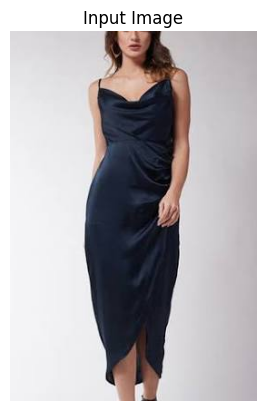

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
Recommended Images:


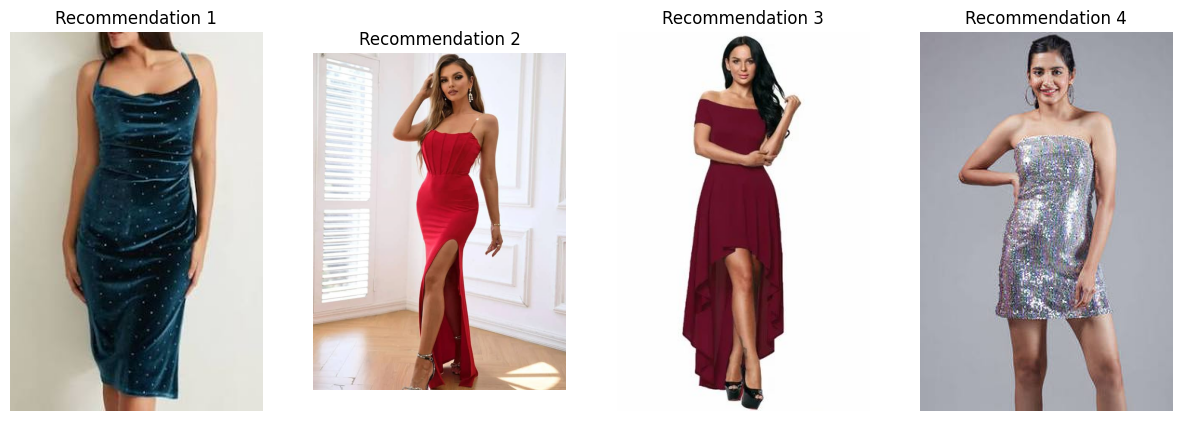

In [80]:
import matplotlib.image as mpimg

# Function to display an image
def display_image(img_path, title="Image"):
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(title)
    plt.show()

# Function to display the recommended images
def display_recommended_images(recommended_images):
    plt.figure(figsize=(15, 15))
    for i, img_path in enumerate(recommended_images):
        img = mpimg.imread(img_path)
        plt.subplot(1, len(recommended_images), i + 1)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Recommendation {i+1}")
    plt.show()

# Test the recommendation system and display the results
input_img_path = image_paths[0]

# Display the input image
print("Input Image:")
display_image(input_img_path, title="Input Image")

# Get recommendations based on the input image
recommended_images = recommend_fashion_items_cnn(input_img_path, all_features, all_image_names, top_n=5)

# Display the recommended images
print("Recommended Images:")
display_recommended_images(recommended_images)



Input Image:


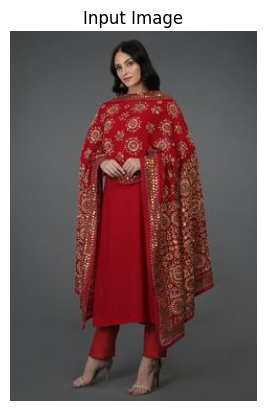

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 955ms/step
Recommended Images:


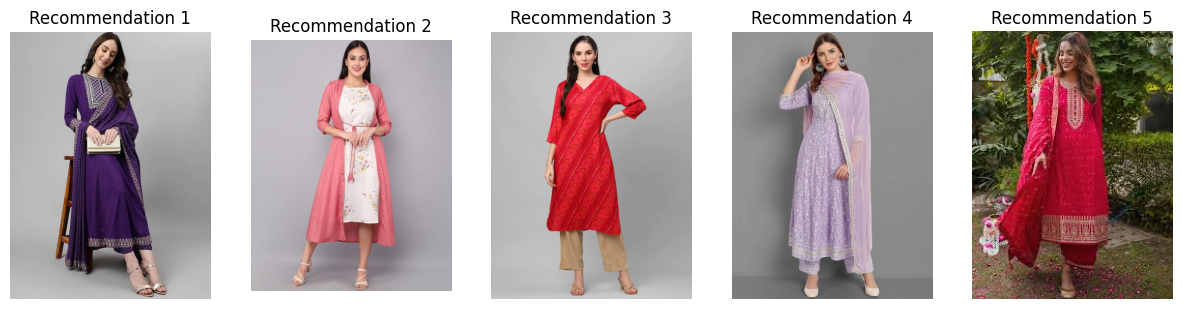

In [81]:
# Directly set the input image path
input_img_path = '/content/drive/MyDrive/ML/kurtha.jpg'

# Display the input image
print("Input Image:")
display_image(input_img_path, title="Input Image")

# Get recommendations based on the input image
recommended_images = recommend_fashion_items_cnn(input_img_path, all_features, all_image_names, top_n=5)

# Display the recommended images
print("Recommended Images:")
display_recommended_images(recommended_images)


Input Image:


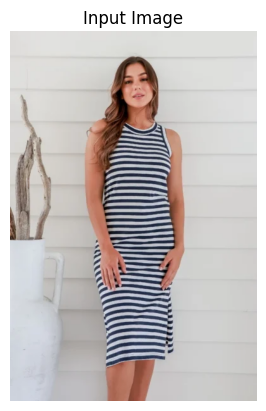

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 893ms/step
Recommended Images:


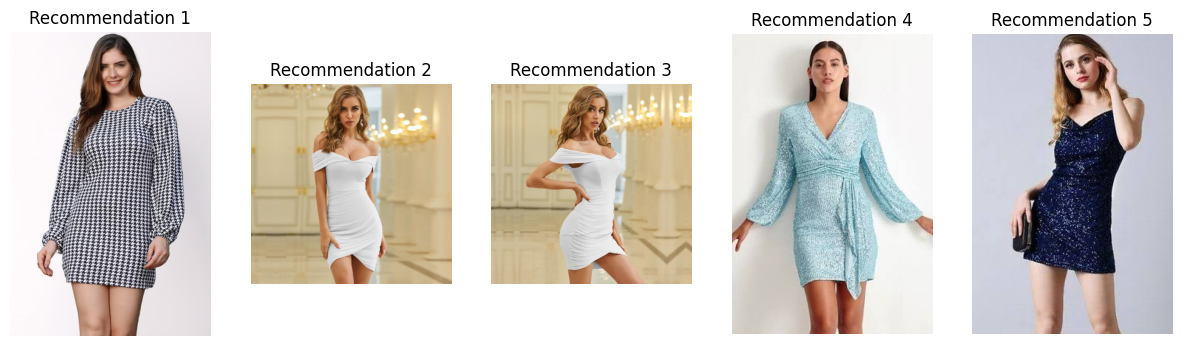

In [82]:
# Directly set the input image path
input_img_path = '/content/drive/MyDrive/ML/onepiece.jpg'

# Display the input image
print("Input Image:")
display_image(input_img_path, title="Input Image")

# Get recommendations based on the input image
recommended_images = recommend_fashion_items_cnn(input_img_path, all_features, all_image_names, top_n=5)

# Display the recommended images
print("Recommended Images:")
display_recommended_images(recommended_images)


Input Image:


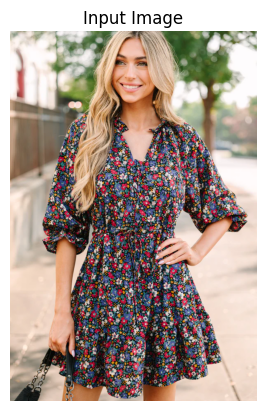

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 629ms/step
Recommended Images:


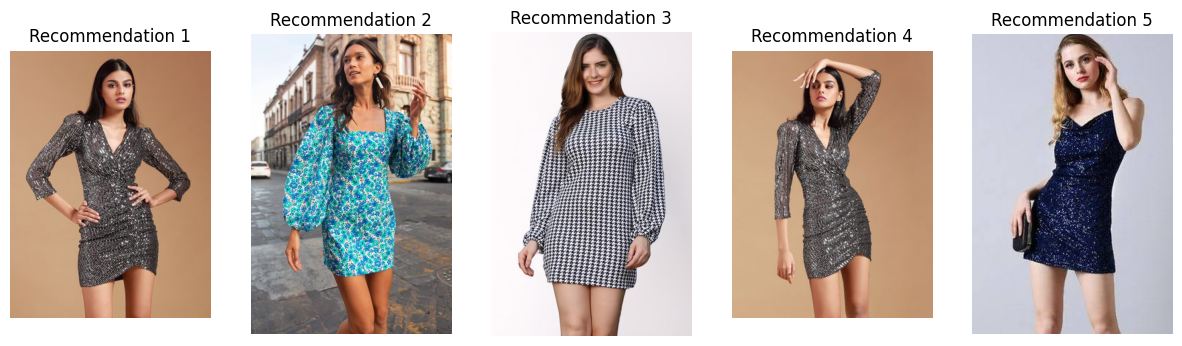

In [84]:
# Directly set the input image path
input_img_path = '/content/drive/MyDrive/ML/flora.jpg'

# Display the input image
print("Input Image:")
display_image(input_img_path, title="Input Image")

# Get recommendations based on the input image
recommended_images = recommend_fashion_items_cnn(input_img_path, all_features, all_image_names, top_n=5)

# Display the recommended images
print("Recommended Images:")
display_recommended_images(recommended_images)


Input Image:


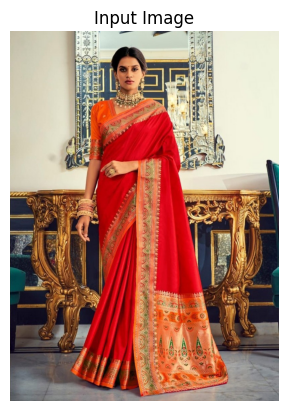

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 551ms/step
Recommended Images:


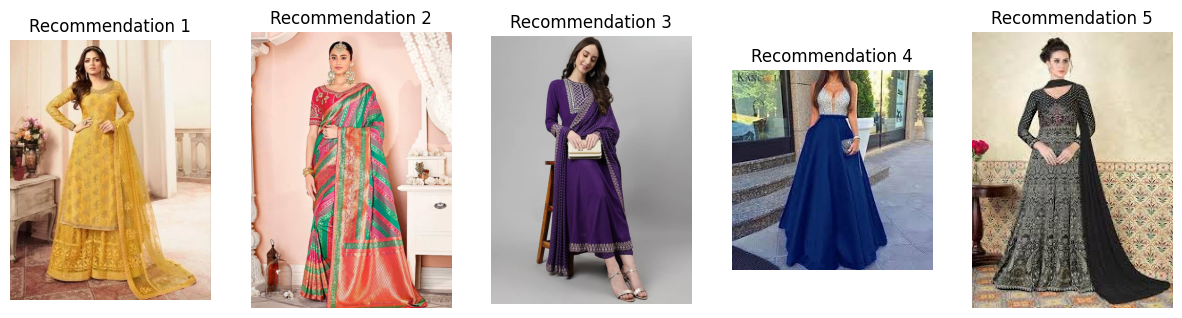

In [85]:
# Directly set the input image path
input_img_path = '/content/drive/MyDrive/ML/saree.jpg'

# Display the input image
print("Input Image:")
display_image(input_img_path, title="Input Image")

# Get recommendations based on the input image
recommended_images = recommend_fashion_items_cnn(input_img_path, all_features, all_image_names, top_n=5)

# Display the recommended images
print("Recommended Images:")
display_recommended_images(recommended_images)


In [86]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image size and parameters
IMG_SIZE = (128, 128)
BATCH_SIZE = 32

# Preprocessing and data augmentation
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_data = datagen.flow_from_directory(
    extract_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset='training')

validation_data = datagen.flow_from_directory(
    extract_dir, target_size=IMG_SIZE, batch_size=BATCH_SIZE, subset='validation')


Found 144 images belonging to 2 classes.
Found 34 images belonging to 2 classes.


In [87]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    return img_array

def extract_features(image_paths):
    all_features = []
    all_image_names = []
    for img_path in image_paths:
        img_array = preprocess_image(img_path)
        features = base_model.predict(img_array)
        features_flatten = features.flatten()
        all_features.append(features_flatten)
        all_image_names.append(img_path)
    return np.array(all_features), all_image_names

all_features, all_image_names = extract_features(image_paths)
input_features, input_image_names = extract_features(input_image_paths)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 687ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 529ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 542ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 571ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 934ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 933ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 978ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 911ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 716ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 528ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 530ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 548ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 532ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 

In [88]:
input_image_paths = [
    '/content/drive/MyDrive/ML/flora.jpg',
    '/content/drive/MyDrive/ML/jeans.jpg',
    '/content/drive/MyDrive/ML/kurtha.jpg',
    '/content/drive/MyDrive/ML/onepiece.jpg',
    '/content/drive/MyDrive/ML/saree.jpg'
]

num_clusters = min(20, len(all_features))

# Apply K-Means clustering on dataset features
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(all_features)

# Get cluster labels for each dataset image
cluster_labels = kmeans.labels_

# Initialize ground truth dictionary
ground_truth = {}

# Define ground truth based on clustering
for i, input_feature in enumerate(input_features):
    input_image_path = input_image_names[i]

    # Calculate cosine similarity between the input image and dataset images
    similarities = cosine_similarity([input_feature], all_features)[0]

    # Find the most similar dataset image and its cluster
    similar_idx = np.argmax(similarities)
    input_cluster = cluster_labels[similar_idx]

    # Define similar images as those in the same cluster
    similar_indices = {idx for idx, label in enumerate(cluster_labels) if label == input_cluster}

    # Assign similar images to the ground truth for the input image
    ground_truth[input_image_path] = similar_indices

# Display the automatically generated ground truth
print("\nAutomatically Generated Ground Truth:")
for input_img, similar_imgs in ground_truth.items():
    print(f"{input_img}: {similar_imgs}")

N = 5

# Initialize evaluation variables
total_precision, total_recall, total_accuracy = 0, 0, 0

# Evaluate each input image
for i, input_feature in enumerate(input_features):
    input_image_path = input_image_names[i]

    # Calculate cosine similarity between the input image and dataset images
    similarities = cosine_similarity([input_feature], all_features)[0]

    # Get indices of the top N similar images
    top_n_indices = np.argsort(similarities)[-N:][::-1]

    # Define true and predicted labels for evaluation
    true_indices = ground_truth.get(input_image_path, set())
    y_true = [1 if idx in true_indices else 0 for idx in range(len(all_image_names))]
    y_pred = [1 if idx in top_n_indices else 0 for idx in range(len(all_image_names))]

    # Calculate precision, recall, and accuracy for this input image
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)

    # Accumulate metrics
    total_precision += precision
    total_recall += recall
    total_accuracy += accuracy

    # Display metrics for the current input image
    print(f"\nInput Image: {input_image_path}")
    print(f"Top recommended images: {[all_image_names[idx] for idx in top_n_indices]}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"Accuracy: {accuracy:.2f}")

# Calculate average metrics over all input images
num_inputs = len(input_image_names)
average_precision = total_precision / num_inputs
average_recall = total_recall / num_inputs
average_accuracy = total_accuracy / num_inputs

# Display overall evaluation results
print("\nOverall Evaluation:")
print(f"Average Precision: {average_precision:.2f}")
print(f"Average Recall: {average_recall:.2f}")
print(f"Average Accuracy: {average_accuracy:.2f}")



Automatically Generated Ground Truth:
/content/drive/MyDrive/ML/flora.jpg: {65, 84, 29, 62}
/content/drive/MyDrive/ML/jeans.jpg: {16, 43, 15}
/content/drive/MyDrive/ML/kurtha.jpg: {9, 74, 77, 46, 14, 47, 81, 50, 52, 21, 95}
/content/drive/MyDrive/ML/onepiece.jpg: {65, 84, 29, 62}
/content/drive/MyDrive/ML/saree.jpg: {9, 74, 77, 46, 14, 47, 81, 50, 52, 21, 95}

Input Image: /content/drive/MyDrive/ML/flora.jpg
Top recommended images: ['/content/DressRec/women fashion/sparkling, sequined dress.jpg', '/content/DressRec/women fashion/short, blue floral dress with long puffed sleeves.jpg', '/content/DressRec/women fashion/dress with a classic black and white houndstooth pattern.jpg', '/content/DressRec/women fashion/sparkling, fitted dress with long sleeves.jpg', '/content/DressRec/women fashion/sparkling blue dress.jpeg']
Precision: 0.60
Recall: 0.75
Accuracy: 0.97

Input Image: /content/drive/MyDrive/ML/jeans.jpg
Top recommended images: ['/content/DressRec/women fashion/ladies-party-wear-

In [89]:
import random

labels = [random.choice([0, 1]) for _ in all_image_names]

# Check the distribution to ensure there are two classes
from collections import Counter
label_distribution = Counter(labels)
print("Label distribution:", label_distribution)


Label distribution: Counter({1: 51, 0: 45})


In [90]:
# Check how many images are assigned to each class
from collections import Counter

label_distribution = Counter(labels)
print("Label distribution:", label_distribution)

Label distribution: Counter({1: 51, 0: 45})


In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# Proceed with the train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(all_features, labels, test_size=0.3, random_state=42)

# Define classical ML models
models = {
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(max_iter=1000)
}

# Train and evaluate models
results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    report = classification_report(y_test, y_pred)

    # Store results
    results[model_name] = {
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Classification Report': report
    }

# Display the results for each model
for model_name, result in results.items():
    print(f"{model_name}:\n"
          f"Accuracy: {result['Accuracy']:.2f}\n"
          f"Precision: {result['Precision']:.2f}\n"
          f"Recall: {result['Recall']:.2f}\n"
          f"F1-Score: {result['F1-Score']:.2f}\n"
          f"Classification Report:\n{result['Classification Report']}\n")


SVM:
Accuracy: 0.62
Precision: 0.78
Recall: 0.62
F1-Score: 0.53
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.15      0.27        13
           1       0.59      1.00      0.74        16

    accuracy                           0.62        29
   macro avg       0.80      0.58      0.51        29
weighted avg       0.78      0.62      0.53        29


KNN:
Accuracy: 0.48
Precision: 0.29
Recall: 0.48
F1-Score: 0.36
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.52      0.88      0.65        16

    accuracy                           0.48        29
   macro avg       0.26      0.44      0.33        29
weighted avg       0.29      0.48      0.36        29


Random Forest:
Accuracy: 0.52
Precision: 0.53
Recall: 0.52
F1-Score: 0.51
Classification Report:
              precision    recall  f1-score   support

           0      

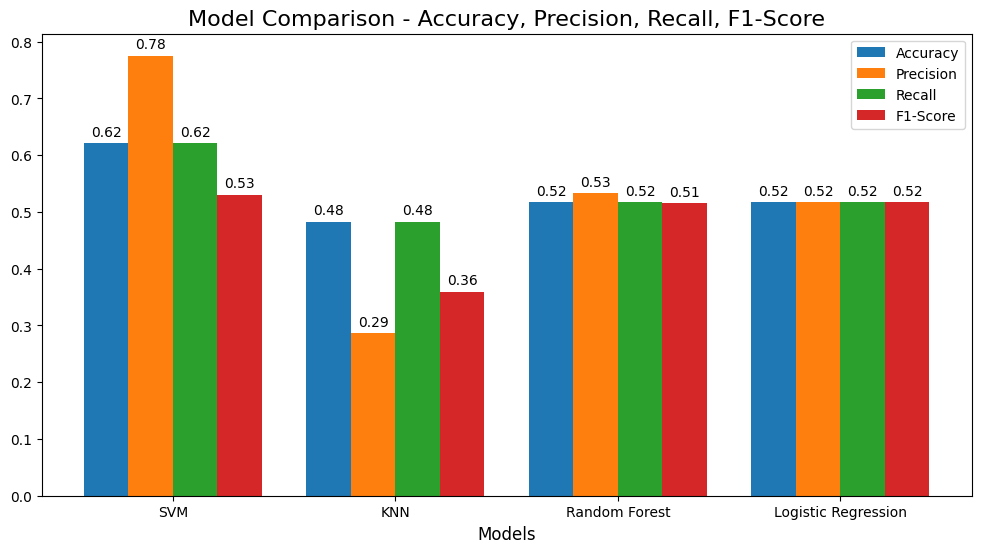

In [93]:
import matplotlib.pyplot as plt
import numpy as np

# Extract metrics from results
model_names = list(results.keys())
accuracies = [results[model_name]['Accuracy'] for model_name in model_names]
precisions = [results[model_name]['Precision'] for model_name in model_names]
recalls = [results[model_name]['Recall'] for model_name in model_names]
f1_scores = [results[model_name]['F1-Score'] for model_name in model_names]

# Create a grouped bar chart
x = np.arange(len(model_names))  # Label locations
width = 0.2  # Width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Plot bars for each metric
bar1 = ax.bar(x - 1.5*width, accuracies, width, label='Accuracy')
bar2 = ax.bar(x - 0.5*width, precisions, width, label='Precision')
bar3 = ax.bar(x + 0.5*width, recalls, width, label='Recall')
bar4 = ax.bar(x + 1.5*width, f1_scores, width, label='F1-Score')

# Add labels and title
ax.set_xlabel('Models', fontsize=12)
ax.set_title('Model Comparison - Accuracy, Precision, Recall, F1-Score', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()

# Add values on top of bars
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # Offset label to slightly above the bar
                    textcoords="offset points",
                    ha='center', va='bottom')

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)

# Show the plot
plt.show()
